<a href="https://colab.research.google.com/github/melimes/Financial-Models-Numerical-Methods/blob/master/RbPumpingLines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
#make changed


#Field dependent states for $^{87}$Rb and $^{85}$Rb pumping for high-field magnetometer project

Develop rudimentary density matrices and solve eigenvalue problem for $A I\cdot J + \gamma B\cdot (I+J) $

1.   Define spin matrix classes
2.   Define constants based on alkali style
3.   Generate Hamiltonian and Diagolize (can speed up)
4.   Need to generative Givens/Jacobi rotations, will be easy to go back and forth between bases for optical pumping, ---ALTERNATIVELY, can just find a given rotation matrix and rotate projectors like Jx Jy, Jz, etc. into new basis
5.   Plot results






---



In [ ]:
class spin_matrix:
    def __init__(self, S):
        self.spin = S
        self.size = int(np.rint(S/(1/2))+1)
        self.x = np.zeros((self.size,self.size), dtype = complex)
        self.y = np.zeros((self.size,self.size), dtype = complex)
        self.z = np.zeros((self.size,self.size), dtype = complex)
        self.p = np.zeros((self.size,self.size), dtype = complex)
        self.m = np.zeros((self.size,self.size), dtype = complex)
        self.s2 = np.zeros((self.size,self.size), dtype = complex)
        self.order = np.arange(S,-S-1,-1)

        for i in range(self.size):
            for k in range(self.size):
                self.x[(k,i)] =  ((int(np.equal(i,k+1)) + int(np.equal(i+1,k)))/2)*np.sqrt(S*(S+1)-self.order[i]*self.order[k])
                self.y[(k,i)] = -1j* ((int(np.equal(i,k+1)) - int(np.equal(i+1,k)))/2)*np.sqrt(S*(S+1) -self.order[i]*self.order[k]);
                self.z[(k,i)] = (int(np.equal(i,k)))*self.order[i];
                self.p[(k,i)] = (int(np.equal(i,k+1)))*np.sqrt(S*(S+1) - self.order[k]*self.order[i]);
                self.m[(k,i)] = (int(np.equal(i+1,k)))*np.sqrt(S*(S+1) - self.order[k]*self.order[i]);
                self.s2[(k,i)] = (int(np.equal(i,k)))*S*(S+1);

class make_J:
    def __init__(self, L,S ):
        J= L.spin+S.spin;
        size = L.size*S.size;
        self.spin = J;
        self.size = size;
        self.x = np.kron(L.x,np.eye(S.size))+np.kron(np.eye(L.size),S.x);
        self.y = np.kron(L.y,np.eye(S.size))+np.kron(np.eye(L.size),S.y);
        self.z = np.kron(L.z,np.eye(S.size))+np.kron(np.eye(L.size),S.z);
        self.j2 = (self.x)*(self.x)+(self.y)*(self.y)+(self.z)*(self.z);
        self.order =  np.arange(J,-J-1,-1)

class make_F:
    def __init__(self, I,J ):
        F= I.spin+J.spin;
        size = I.size*J.size;
        self.spin = F;
        self.size = size;
        self.x = np.kron(I.x,np.eye(J.size))+np.kron(np.eye(I.size),J.x);
        self.y = np.kron(I.y,np.eye(J.size))+np.kron(np.eye(I.size),J.y);
        self.z = np.kron(I.z,np.eye(J.size))+np.kron(np.eye(I.size),J.z);
        self.j2 = (self.x)*(self.x)+(self.y)*(self.y)+(self.z)*(self.z);
        self.order = np.arange(F, -F-1, -1)

In [ ]:
S = spin_matrix(1)
L =
print(S.x)

[[0.        +0.j 0.70710678+0.j 0.        +0.j]
 [0.70710678+0.j 0.        +0.j 0.70710678+0.j]
 [0.        +0.j 0.70710678+0.j 0.        +0.j]]


In [ ]:
g_e = 28.024952666e9 #gyromagnetic ratio free electron (Hz/T)
muB_hbar = g_e/2.0023193043617 #Bohr magneton over hbar

g_87Rb_L = 0.99999369*muB_hbar  #orbital angular (Hz/T)
g_87Rb_n = -0.0009951414*muB_hbar #gyromagnetic ratio 87Rb nucleus (Hz/T)
g_85Rb_n = -0.0002936400*muB_hbar #gyromagnetic ratio 85Rb nucleus (Hz/T)

g_J_87Rb_S_1_2 = 2.00233113*muB_hbar
g_J_87Rb_P_1_2 = 0.666*muB_hbar

g_J_85Rb_S_1_2 = 2.00233113*muB_hbar
g_J_85Rb_P_1_2 = 0.666*muB_hbar

Ahyp_87Rb_S_1_2 = 3.41734130542515e9 #87Rb S_1/2 hyperfine coupling (Hz)
Ahyp_85Rb_S_1_2 = 1.0119108130e9 #85Rb S_1/2 hyperfine coupling (Hz)

Ahyp_87Rb_P_1_2 = 408.328e6 #87Rb P_1/2 hyperfine coupling (Hz)
Ahyp_85Rb_P_1_2= 120.527e6 #85Rb P_1/2 hyperfine coupling (Hz)


D1_87Rb = 377.107385690e12 #Hz
D1_85Rb = 377.1074635e12 #Hz

print(g_87Rb_L/1e9)
print(g_87Rb_n/1e6)

13.996157240007447
-13.928243397656987


In [ ]:
A, B0, ge, gn = sp.symbols('A, B0, ge, gn', positive =True)

#spin 3/2 * 1/2 ground state
I = spin_matrix(3/2)
L = spin_matrix(0)
S = spin_matrix(1/2)
J = make_J(L,S)
F = make_F(I,J)
Fe = make_F(I,J)
H = (A*(np.kron(I.z,np.eye(J.size))@np.kron(np.eye(I.size),J.z)
       +np.kron(I.x,np.eye(J.size))@np.kron(np.eye(I.size),J.x)
       +np.kron(I.y,np.eye(J.size))@np.kron(np.eye(I.size),J.y))
      +gn*np.kron(I.z,np.eye(J.size))*B0+ge*np.kron(np.eye(I.size),S.z)*B0)  #Make H = A I dot J + g_n I B + g_e J B
HH = sp.Matrix(H)

display(sp.simplify(HH))
V, D = HH.diagonalize()
#display(V)
#out = HH.eigenvect()
diags87Rb = np.diagonal(D)

#spin 5/2 * 1/2 ground state
I = spin_matrix(5/2)
L = spin_matrix(0)
S = spin_matrix(1/2)
J = make_J(L,S)
F = make_F(I,J)
Fe = make_F(I,J)
H = (A*(np.kron(I.z,np.eye(J.size))@np.kron(np.eye(I.size),J.z)
       +np.kron(I.x,np.eye(J.size))@np.kron(np.eye(I.size),J.x)
       +np.kron(I.y,np.eye(J.size))@np.kron(np.eye(I.size),J.y))
      +gn*np.kron(I.z,np.eye(J.size))*B0+ge*np.kron(np.eye(I.size),S.z)*B0)  #Make H = A I dot J + g_n I B + g_J J B
HH = sp.Matrix(H)

display(sp.simplify(HH))
#V, D = HH.diagonalize()

#display(V)

diags85Rb = np.diagonal(D)

Matrix([
[0.75*A + 0.5*B0*ge + 1.5*B0*gn,                               0,                              0,                               0,                               0,                              0,                               0,                              0],
[                             0, -0.75*A - 0.5*B0*ge + 1.5*B0*gn,            0.866025403784439*A,                               0,                               0,                              0,                               0,                              0],
[                             0,             0.866025403784439*A, 0.25*A + 0.5*B0*ge + 0.5*B0*gn,                               0,                               0,                              0,                               0,                              0],
[                             0,                               0,                              0, -0.25*A - 0.5*B0*ge + 0.5*B0*gn,                           1.0*A,                              0,          

Matrix([
[1.25*A + 0.5*B0*ge + 2.5*B0*gn,                               0,                              0,                               0,                              0,                               0,                               0,                              0,                               0,                              0,                               0,                              0],
[                             0, -1.25*A - 0.5*B0*ge + 2.5*B0*gn,             1.11803398874989*A,                               0,                              0,                               0,                               0,                              0,                               0,                              0,                               0,                              0],
[                             0,              1.11803398874989*A, 0.75*A + 0.5*B0*ge + 1.5*B0*gn,                               0,                              0,                               0,            

In [ ]:
display(D.subs([(A, Ahyp_87Rb_S_1_2), (gn ,g_87Rb_n), (ge,g_J_87Rb_S_1_2),(B0,0)]))

Matrix([
[-4271676631.78144,                0,                 0,                0,                 0,                0,                0,                0],
[                0, 2563005979.06886,                 0,                0,                 0,                0,                0,                0],
[                0,                0, -4271676631.78144,                0,                 0,                0,                0,                0],
[                0,                0,                 0, 2563005979.06886,                 0,                0,                0,                0],
[                0,                0,                 0,                0, -4271676631.78144,                0,                0,                0],
[                0,                0,                 0,                0,                 0, 2563005979.06886,                0,                0],
[                0,                0,                 0,                0,                 0,    

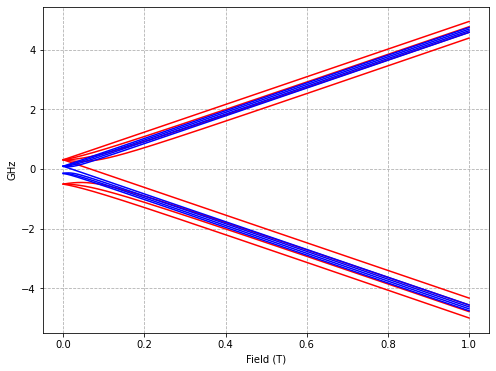

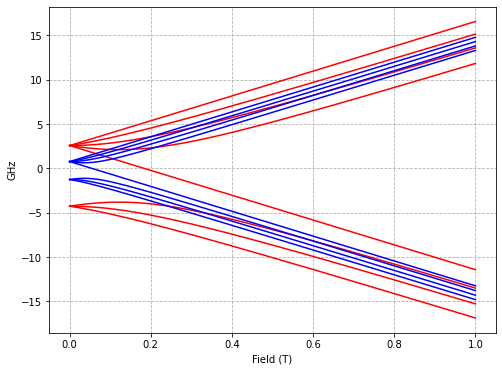

In [ ]:
fields = np.linspace(0,1, 1001)

plt.figure(figsize = (8,6))
for i in np.arange(len(diags87Rb)):
  state = diags87Rb[i].subs([(A, Ahyp_87Rb_P_1_2), (gn ,g_87Rb_n), (ge,g_J_87Rb_P_1_2)])
  stateFunc = sp.utilities.lambdify(B0, state,'numpy')
  plt.plot(fields, stateFunc(fields)/1e9, 'r', label = f'state {i}')

for i in np.arange(len(diags85Rb)):
  state = diags85Rb[i].subs([(A, Ahyp_85Rb_P_1_2), (gn ,g_85Rb_n), (ge,g_J_85Rb_P_1_2)])
  stateFunc = sp.utilities.lambdify(B0, state,'numpy')
  plt.plot(fields, stateFunc(fields)/1e9, 'b', label = f'state {i}')
plt.ylabel('GHz')
plt.xlabel('Field (T)')
#plt.legend()
plt.grid(linestyle = 'dashed')
plt.show()

plt.figure(figsize = (8,6))
for i in np.arange(len(diags87Rb)):
  state = diags87Rb[i].subs([(A, Ahyp_87Rb_S_1_2), (gn ,g_87Rb_n), (ge,g_J_87Rb_S_1_2)])
  stateFunc = sp.utilities.lambdify(B0, state,'numpy')
  plt.plot(fields, stateFunc(fields)/1e9, 'r', label = f'state {i}')

for i in np.arange(len(diags85Rb)):
  state = diags85Rb[i].subs([(A, Ahyp_85Rb_S_1_2), (gn ,g_85Rb_n), (ge,g_J_85Rb_S_1_2)])
  stateFunc = sp.utilities.lambdify(B0, state,'numpy')
  plt.plot(fields, stateFunc(fields)/1e9, 'b', label = f'state {i}')
plt.ylabel('GHz')
plt.xlabel('Field (T)')
#plt.legend()
plt.grid(linestyle = 'dashed')
plt.show()

Need to add selection rules

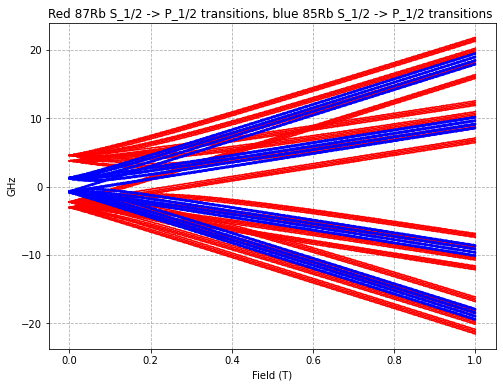

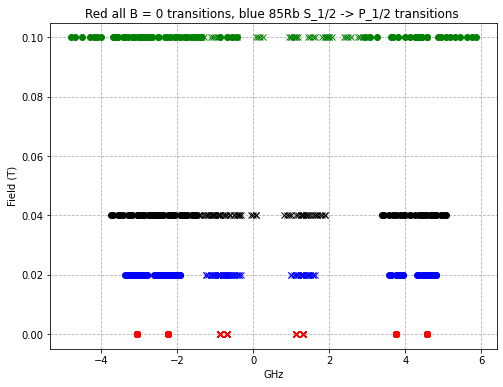

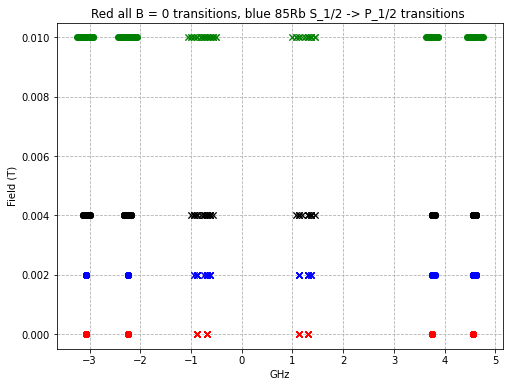

In [ ]:
fields = np.linspace(0,1, 1001)

plt.figure(figsize = (8,6))
for i in np.arange(len(diags87Rb)):
  excited_state_87Rb = diags87Rb[i].subs([(A, Ahyp_87Rb_P_1_2), (gn ,g_87Rb_n), (ge,g_J_87Rb_P_1_2)])
  excited_stateFunc_87Rb = sp.utilities.lambdify(B0, excited_state_87Rb,'numpy')
  for j in np.arange(len(diags87Rb)):
    ground_state_87Rb = diags87Rb[j].subs([(A, Ahyp_87Rb_S_1_2), (gn ,g_87Rb_n), (ge,g_J_87Rb_S_1_2)])
    ground_stateFunc_87Rb = sp.utilities.lambdify(B0, ground_state_87Rb,'numpy')
    transition_87Rb = D1_87Rb+ excited_stateFunc_87Rb(fields)/1e9 - ground_stateFunc_87Rb(fields)/1e9
    plt.plot(fields, transition_87Rb - D1_87Rb, 'r', label = f'87Rb P_1/2 state {i} - S_1/2 state {j}')

for i in np.arange(len(diags85Rb)):
  excited_state_85Rb = diags85Rb[i].subs([(A, Ahyp_85Rb_P_1_2), (gn ,g_85Rb_n), (ge,g_J_85Rb_P_1_2)])
  excited_stateFunc_85Rb  = sp.utilities.lambdify(B0, excited_state_85Rb ,'numpy')
  for j in np.arange(len(diags85Rb)):
    ground_state_85Rb  = diags85Rb[j].subs([(A, Ahyp_85Rb_S_1_2), (gn ,g_85Rb_n), (ge,g_J_85Rb_S_1_2)])
    ground_stateFunc_85Rb  = sp.utilities.lambdify(B0, ground_state_85Rb ,'numpy')
    transition_85Rb  = D1_85Rb+ excited_stateFunc_85Rb(fields)/1e9 - ground_stateFunc_85Rb(fields)/1e9
    plt.plot(fields, transition_85Rb  - D1_85Rb, 'b', label = f'85Rb P_1/2 state {i} - S_1/2 state {j}')

plt.ylabel('GHz')
plt.xlabel('Field (T)')
#plt.legend()
plt.grid(linestyle = 'dashed')
plt.title('Red 87Rb S_1/2 -> P_1/2 transitions, blue 85Rb S_1/2 -> P_1/2 transitions ')
plt.show()


#
plt.figure(figsize = (8,6))
for i in np.arange(len(diags87Rb)):
  excited_state_87Rb = diags87Rb[i].subs([(A, Ahyp_87Rb_P_1_2), (gn ,g_87Rb_n), (ge,g_J_87Rb_P_1_2)])
  excited_stateFunc_87Rb = sp.utilities.lambdify(B0, excited_state_87Rb,'numpy')
  for j in np.arange(len(diags87Rb)):
    ground_state_87Rb = diags87Rb[j].subs([(A, Ahyp_87Rb_S_1_2), (gn ,g_87Rb_n), (ge,g_J_87Rb_S_1_2)])
    ground_stateFunc_87Rb = sp.utilities.lambdify(B0, ground_state_87Rb,'numpy')
    transition_87Rb = D1_87Rb+ excited_stateFunc_87Rb(0)/1e9 - ground_stateFunc_87Rb(0)/1e9
    plt.plot( transition_87Rb - D1_87Rb, 0,  'ro', label = f'87Rb P_1/2 state {i} - S_1/2 state {j}')
    field =0.02
    transition_87Rb = D1_87Rb+ excited_stateFunc_87Rb(field)/1e9 - ground_stateFunc_87Rb(field)/1e9
    plt.plot( transition_87Rb - D1_87Rb, field,  'bo', label = f'87Rb P_1/2 state {i} - S_1/2 state {j}')
    field=0.04
    transition_87Rb = D1_87Rb+ excited_stateFunc_87Rb(field)/1e9 - ground_stateFunc_87Rb(field)/1e9
    plt.plot( transition_87Rb - D1_87Rb, field,  'ko', label = f'87Rb P_1/2 state {i} - S_1/2 state {j}')
    field = 0.1
    transition_87Rb = D1_87Rb+ excited_stateFunc_87Rb(field)/1e9 - ground_stateFunc_87Rb(field)/1e9
    plt.plot( transition_87Rb - D1_87Rb, field,  'go', label = f'87Rb P_1/2 state {i} - S_1/2 state {j}')

for i in np.arange(len(diags85Rb)):
  excited_state_85Rb = diags85Rb[i].subs([(A, Ahyp_85Rb_P_1_2), (gn ,g_85Rb_n), (ge,g_J_85Rb_P_1_2)])
  excited_stateFunc_85Rb  = sp.utilities.lambdify(B0, excited_state_85Rb ,'numpy')
  for j in np.arange(len(diags85Rb)):
    ground_state_85Rb  = diags85Rb[j].subs([(A, Ahyp_85Rb_S_1_2), (gn ,g_85Rb_n), (ge,g_J_85Rb_S_1_2)])
    ground_stateFunc_85Rb  = sp.utilities.lambdify(B0, ground_state_85Rb ,'numpy')
    transition_85Rb  = D1_85Rb+ excited_stateFunc_85Rb(0)/1e9 - ground_stateFunc_85Rb(0)/1e9
    plt.plot(transition_85Rb  - D1_85Rb, 0, 'rx', label = f'85Rb P_1/2 state {i} - S_1/2 state {j}')
    field =0.02
    transition_85Rb  = D1_85Rb+ excited_stateFunc_85Rb(field)/1e9 - ground_stateFunc_85Rb(field)/1e9
    plt.plot(transition_85Rb  - D1_85Rb, field, 'bx', label = f'85Rb P_1/2 state {i} - S_1/2 state {j}')
    field = 0.04
    transition_85Rb  = D1_85Rb+ excited_stateFunc_85Rb(field)/1e9 - ground_stateFunc_85Rb(field)/1e9
    plt.plot(transition_85Rb  - D1_85Rb, field, 'kx', label = f'85Rb P_1/2 state {i} - S_1/2 state {j}')
    field = 0.1
    transition_85Rb  = D1_85Rb+ excited_stateFunc_85Rb(field)/1e9 - ground_stateFunc_85Rb(field)/1e9
    plt.plot(transition_85Rb  - D1_85Rb, field, 'gx', label = f'85Rb P_1/2 state {i} - S_1/2 state {j}')
plt.ylabel('Field (T)')
plt.xlabel('GHz')
#plt.legend()
plt.grid(linestyle = 'dashed')
plt.title('Red all B = 0 transitions, blue 85Rb S_1/2 -> P_1/2 transitions ')
plt.show()
#

plt.figure(figsize = (8,6))
for i in np.arange(len(diags87Rb)):
  excited_state_87Rb = diags87Rb[i].subs([(A, Ahyp_87Rb_P_1_2), (gn ,g_87Rb_n), (ge,g_J_87Rb_P_1_2)])
  excited_stateFunc_87Rb = sp.utilities.lambdify(B0, excited_state_87Rb,'numpy')
  for j in np.arange(len(diags87Rb)):
    ground_state_87Rb = diags87Rb[j].subs([(A, Ahyp_87Rb_S_1_2), (gn ,g_87Rb_n), (ge,g_J_87Rb_S_1_2)])
    ground_stateFunc_87Rb = sp.utilities.lambdify(B0, ground_state_87Rb,'numpy')
    transition_87Rb = D1_87Rb+ excited_stateFunc_87Rb(0)/1e9 - ground_stateFunc_87Rb(0)/1e9
    plt.plot( transition_87Rb - D1_87Rb, 0,  'ro', label = f'87Rb P_1/2 state {i} - S_1/2 state {j}')
    field =0.002
    transition_87Rb = D1_87Rb+ excited_stateFunc_87Rb(field)/1e9 - ground_stateFunc_87Rb(field)/1e9
    plt.plot( transition_87Rb - D1_87Rb, field,  'bo', label = f'87Rb P_1/2 state {i} - S_1/2 state {j}')
    field=0.004
    transition_87Rb = D1_87Rb+ excited_stateFunc_87Rb(field)/1e9 - ground_stateFunc_87Rb(field)/1e9
    plt.plot( transition_87Rb - D1_87Rb, field,  'ko', label = f'87Rb P_1/2 state {i} - S_1/2 state {j}')
    field = 0.01
    transition_87Rb = D1_87Rb+ excited_stateFunc_87Rb(field)/1e9 - ground_stateFunc_87Rb(field)/1e9
    plt.plot( transition_87Rb - D1_87Rb, field,  'go', label = f'87Rb P_1/2 state {i} - S_1/2 state {j}')

for i in np.arange(len(diags85Rb)):
  excited_state_85Rb = diags85Rb[i].subs([(A, Ahyp_85Rb_P_1_2), (gn ,g_85Rb_n), (ge,g_J_85Rb_P_1_2)])
  excited_stateFunc_85Rb  = sp.utilities.lambdify(B0, excited_state_85Rb ,'numpy')
  for j in np.arange(len(diags85Rb)):
    ground_state_85Rb  = diags85Rb[j].subs([(A, Ahyp_85Rb_S_1_2), (gn ,g_85Rb_n), (ge,g_J_85Rb_S_1_2)])
    ground_stateFunc_85Rb  = sp.utilities.lambdify(B0, ground_state_85Rb ,'numpy')
    transition_85Rb  = D1_85Rb+ excited_stateFunc_85Rb(0)/1e9 - ground_stateFunc_85Rb(0)/1e9
    plt.plot(transition_85Rb  - D1_85Rb, 0, 'rx', label = f'85Rb P_1/2 state {i} - S_1/2 state {j}')
    field =0.002
    transition_85Rb  = D1_85Rb+ excited_stateFunc_85Rb(field)/1e9 - ground_stateFunc_85Rb(field)/1e9
    plt.plot(transition_85Rb  - D1_85Rb, field, 'bx', label = f'85Rb P_1/2 state {i} - S_1/2 state {j}')
    field = 0.004
    transition_85Rb  = D1_85Rb+ excited_stateFunc_85Rb(field)/1e9 - ground_stateFunc_85Rb(field)/1e9
    plt.plot(transition_85Rb  - D1_85Rb, field, 'kx', label = f'85Rb P_1/2 state {i} - S_1/2 state {j}')
    field = 0.01
    transition_85Rb  = D1_85Rb+ excited_stateFunc_85Rb(field)/1e9 - ground_stateFunc_85Rb(field)/1e9
    plt.plot(transition_85Rb  - D1_85Rb, field, 'gx', label = f'85Rb P_1/2 state {i} - S_1/2 state {j}')
plt.ylabel('Field (T)')
plt.xlabel('GHz')
#plt.legend()
plt.grid(linestyle = 'dashed')
plt.title('Red all B = 0 transitions, blue 85Rb S_1/2 -> P_1/2 transitions ')
plt.show()